In [2]:
library(readr)
# 仮想データ読み込み
amount1_data <- read_csv("amount1.csv")
# View(amount1_data)

head(amount1_data)

Parsed with column specification:
cols(
  amount = col_double(),
  invest = col_double()
)



amount,invest
<dbl>,<dbl>
296.6501,132.23378
268.5920,107.81794
304.8194,90.57184
263.6498,77.51110
246.7538,74.13405
309.6545,161.44121


In [3]:
summary(amount1_data)

     amount          invest      
 Min.   :220.2   Min.   : 37.02  
 1st Qu.:279.4   1st Qu.:103.92  
 Median :302.0   Median :145.05  
 Mean   :298.1   Mean   :150.01  
 3rd Qu.:320.8   3rd Qu.:196.05  
 Max.   :354.5   Max.   :258.54  

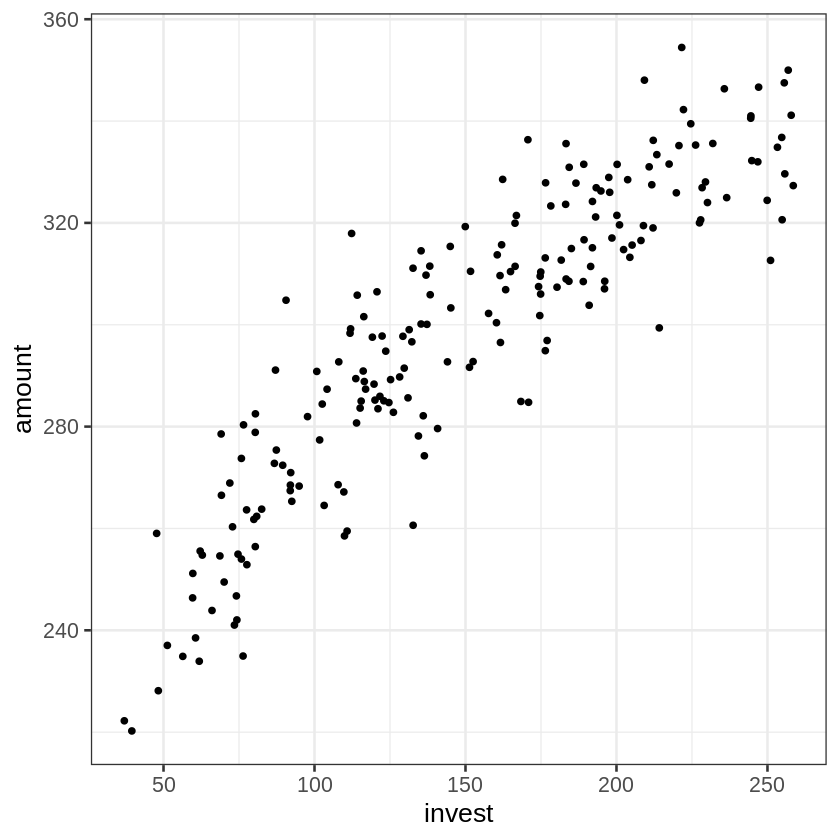

In [4]:
library(ggplot2)
#散布図
ggplot(amount1_data, aes(x=invest,y=amount)) +
  geom_point() +
  theme_bw(16)

In [5]:
#回帰線モデル
amount1.lm1 <- lm(amount~invest, data=amount1_data)
summary(amount1.lm1)


Call:
lm(formula = amount ~ invest, data = amount1_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.521  -8.274   0.322   8.700  36.961 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 229.81293    2.56174   89.71   <2e-16 ***
invest        0.45554    0.01593   28.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.07 on 198 degrees of freedom
Multiple R-squared:  0.8051,	Adjusted R-squared:  0.8042 
F-statistic: 818.1 on 1 and 198 DF,  p-value: < 2.2e-16


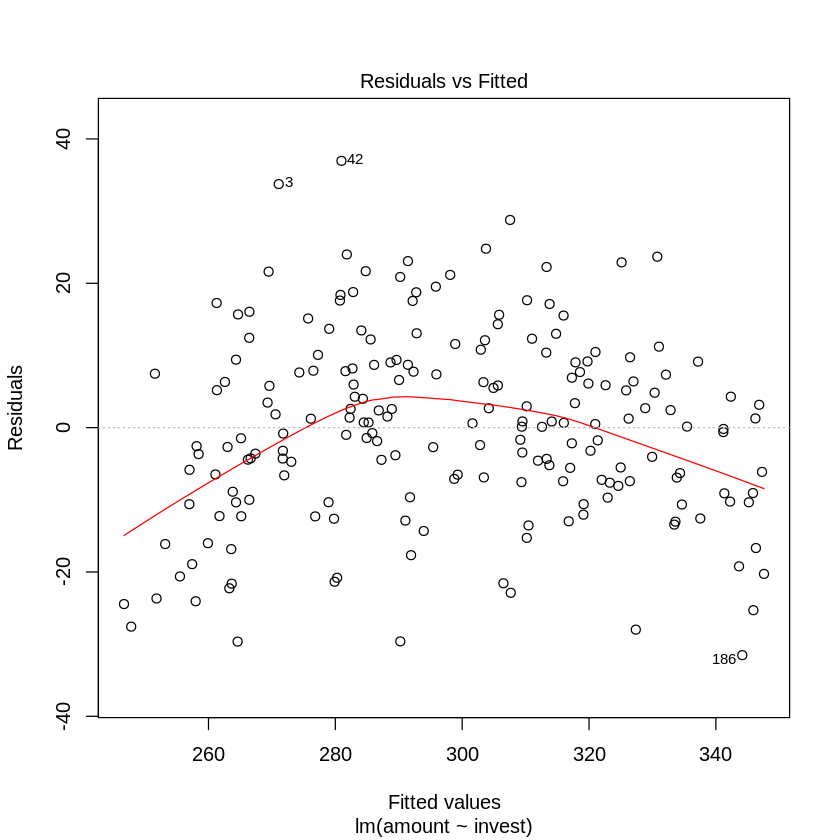

In [6]:
#残差の確認
plot(amount1.lm1, which = 1)

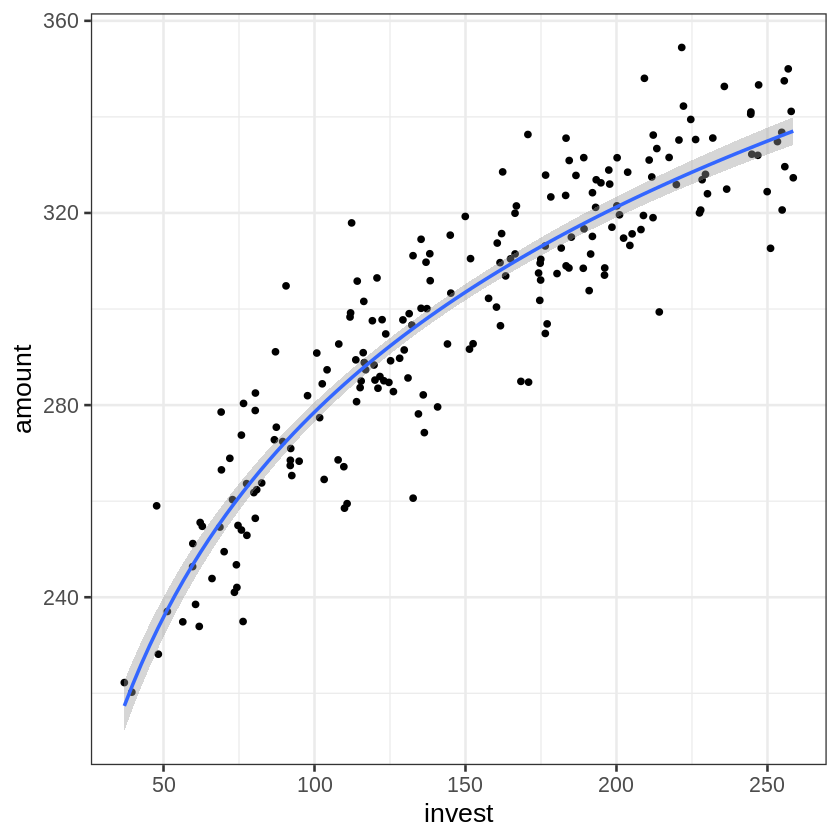

In [7]:
#逓減型の回帰モデルの描画
ggplot(amount1_data, aes(x=invest,y=amount)) +
  geom_point() +
  theme_bw(16) +
  geom_smooth(method = "lm", formula = y~log(x))


Call:
lm(formula = amount ~ log(invest), data = amount1_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.328  -7.181  -0.875   7.540  32.365 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.005      9.436   -0.53    0.596    
log(invest)   61.574      1.909   32.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.84 on 198 degrees of freedom
Multiple R-squared:  0.8401,	Adjusted R-squared:  0.8393 
F-statistic:  1040 on 1 and 198 DF,  p-value: < 2.2e-16


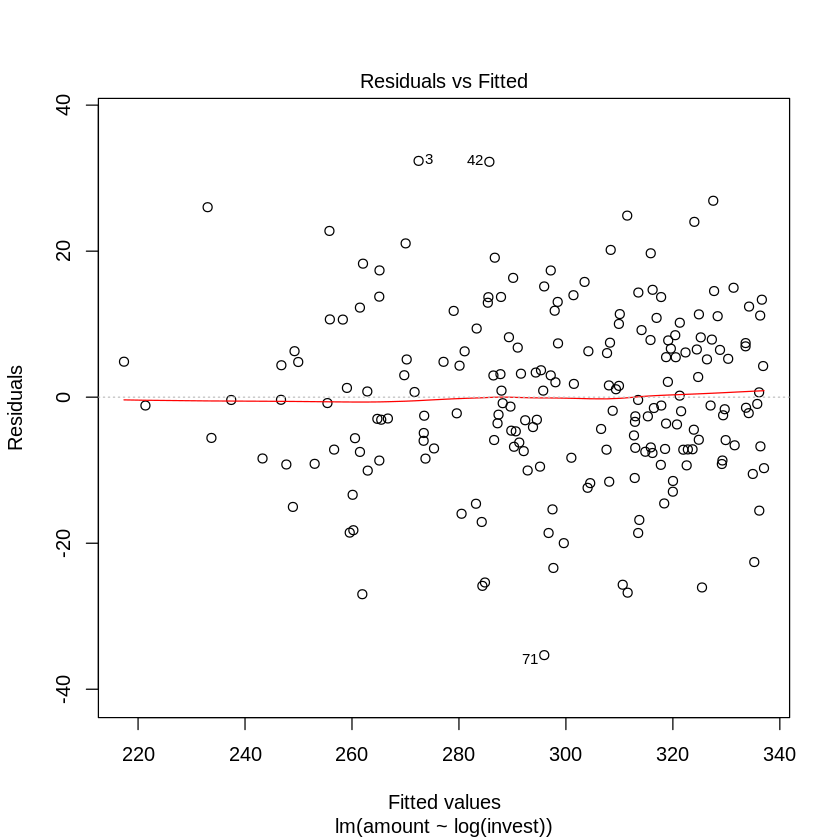

In [8]:
#逓減型の回帰モデルの構築
amount1.lm2 <- lm(amount~log(invest), data = amount1_data)
summary(amount1.lm2)

plot(amount1.lm2, which = 1)